## **1. Mount Google Drive and Load Data**
***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
supply_chain_path = '/content/drive/My Drive/Covid-19'
print(os.listdir(supply_chain_path))

['COVID-19.csv']


In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Covid-19/COVID-19.csv', encoding='latin-1')

***

## **2. Initial Inspection**
***

In [8]:
# Shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 81713 rows and 135 columns.


In [9]:
# Display a concise summary of the DataFrame.
print("Data-type and Non-Null Count")
df.info(verbose=True)

Data-type and Non-Null Count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81713 entries, 0 to 81712
Data columns (total 135 columns):
 #    Column                                                                        Dtype  
---   ------                                                                        -----  
 0    state                                                                         object 
 1    date                                                                          object 
 2    critical_staffing_shortage_today_yes                                          int64  
 3    critical_staffing_shortage_today_no                                           int64  
 4    critical_staffing_shortage_today_not_reported                                 int64  
 5    critical_staffing_shortage_anticipated_within_week_yes                        int64  
 6    critical_staffing_shortage_anticipated_within_week_no                         int64  
 7    critical_staffing_shortage_

In [11]:
# Display the first 5 rows of the DataFrame.
print("First 5 Rows of the Dataset")
df.head()

First 5 Rows of the Dataset


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,AR,2021/06/12,13,96,2,16,93,2,1.0,109,...,NaN,0,NaN,0,NaN,0,284.0,109,423.0,109
1,IA,2021/05/19,1,65,60,1,65,60,0.0,124,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,RI,2021/03/30,3,11,1,3,11,1,7.0,14,...,NaN,0,NaN,0,NaN,0,77.0,14,96.0,14
3,RI,2021/03/29,3,11,1,3,11,1,7.0,14,...,NaN,0,NaN,0,NaN,0,73.0,14,96.0,14
4,MS,2020/05/23,0,0,80,0,0,80,4.0,77,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [18]:
pd.set_option('display.max_rows', None)

# Calculate the percentage of missing (blank) cells in each column.
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))

pd.reset_option('display.max_rows')

geocoded_state                                                                  100.000000
previous_day_admission_pediatric_covid_confirmed_12_17                           45.340399
previous_day_admission_pediatric_covid_confirmed_5_11                            45.324489
previous_day_admission_pediatric_covid_confirmed_0_4                             44.560841
previous_day_admission_pediatric_covid_confirmed_unknown                         44.418881
staffed_icu_pediatric_patients_confirmed_covid                                   36.896210
on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses                     27.972293
previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used                 27.902537
on_hand_supply_therapeutic_b_bamlanivimab_courses                                24.819796
previous_week_therapeutic_b_bamlanivimab_courses_used                            24.730459
on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses                       22.232692

In [22]:
#  Calculate the duplicate rows present in the dataset
df.duplicated().sum()

np.int64(0)

***

## **3. Data Cleaning and Preprocessing**
***

###### **Data Formatting**

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
print(df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81713 entries, 0 to 81712
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: datetime64[ns](1), float64(77), int64(56), object(1)
memory usage: 84.2+ MB
None


###### **Handling Missing Values**

In [19]:
# We will remove any column that is missing more than 20% of its data.
print("Checking for columns with more than 20% missing data...")
missing_percentage = df.isnull().sum() / len(df) * 100
cols_to_drop = missing_percentage[missing_percentage > 20].index


df.drop(columns=cols_to_drop, inplace=True)
print(f"Removed {len(cols_to_drop)} columns: {list(cols_to_drop)}")

Checking for columns with more than 20% missing data...
Removed 12 columns: ['geocoded_state', 'on_hand_supply_therapeutic_a_casirivimab_imdevimab_courses', 'on_hand_supply_therapeutic_b_bamlanivimab_courses', 'on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses', 'previous_week_therapeutic_a_casirivimab_imdevimab_courses_used', 'previous_week_therapeutic_b_bamlanivimab_courses_used', 'previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used', 'previous_day_admission_pediatric_covid_confirmed_0_4', 'previous_day_admission_pediatric_covid_confirmed_12_17', 'previous_day_admission_pediatric_covid_confirmed_5_11', 'previous_day_admission_pediatric_covid_confirmed_unknown', 'staffed_icu_pediatric_patients_confirmed_covid']


In [20]:
# Now we fill the few remaining random blanks in the remaining columns with 0.
print("Filling any remaining blank cells with 0...")
df.fillna(0, inplace=True)

Filling any remaining blank cells with 0...


In [21]:
print(f"\nTotal remaining missing values: {df.isnull().sum().sum()}")

# Let's also check the new shape of our data.
print(f"The cleaned dataset now has {df.shape[0]} rows and {df.shape[1]} columns.")


Total remaining missing values: 0
The cleaned dataset now has 81713 rows and 123 columns.


***

## **4. EDA**
***

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###### **National Hospitalization Trend**

In [24]:
# Set a visual style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

In [25]:
# Calculate the national daily totals
# We group the data by 'date' and then sum up the values for each day across all states.
# We are interested in the 'total_adult_patients_hospitalized_confirmed_covid' and
# 'total_pediatric_patients_hospitalized_confirmed_covid' columns.
national_trends = df.groupby('date')[[
    'total_adult_patients_hospitalized_confirmed_covid',
    'total_pediatric_patients_hospitalized_confirmed_covid'
]].sum()

In [26]:
# Create a new column for the total of adults and children combined.
national_trends['total_patients'] = national_trends['total_adult_patients_hospitalized_confirmed_covid'] + national_trends['total_pediatric_patients_hospitalized_confirmed_covid']

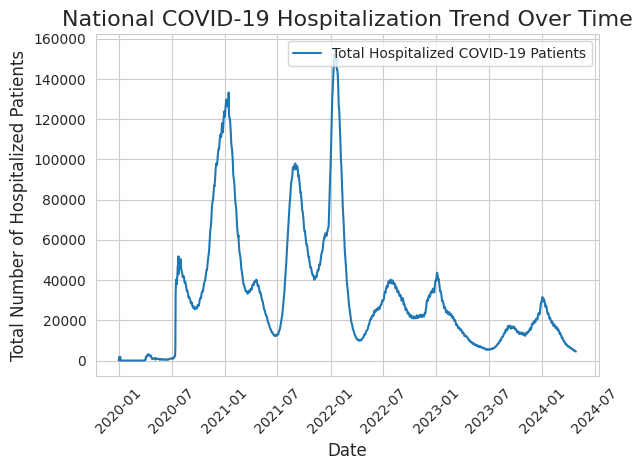

In [29]:
# Plot the 'total_patients' over time.
plt.plot(national_trends.index, national_trends['total_patients'], label='Total Hospitalized COVID-19 Patients')
plt.xticks(rotation=45)

# Add titles and labels
plt.title('National COVID-19 Hospitalization Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Number of Hospitalized Patients', fontsize=12)
plt.legend()
plt.tight_layout() # Adjusts the plot to make sure everything fits without overlapping

# Show the plot
plt.show()

> This chart clearly shows that the pandemic did not hit the country as a single, steady event, but rather as a series of distinct and powerful waves. Each peak represents a period of intense strain on the nation's hospital system.

* The pandemic came in at least four major waves.

* The winter months were consistently the most dangerous periods.

* The Omicron wave in early 2022 was the absolute peak of the crisis for hospitals.
***

###### **Comparing Hospitalization Trends Across Key States**

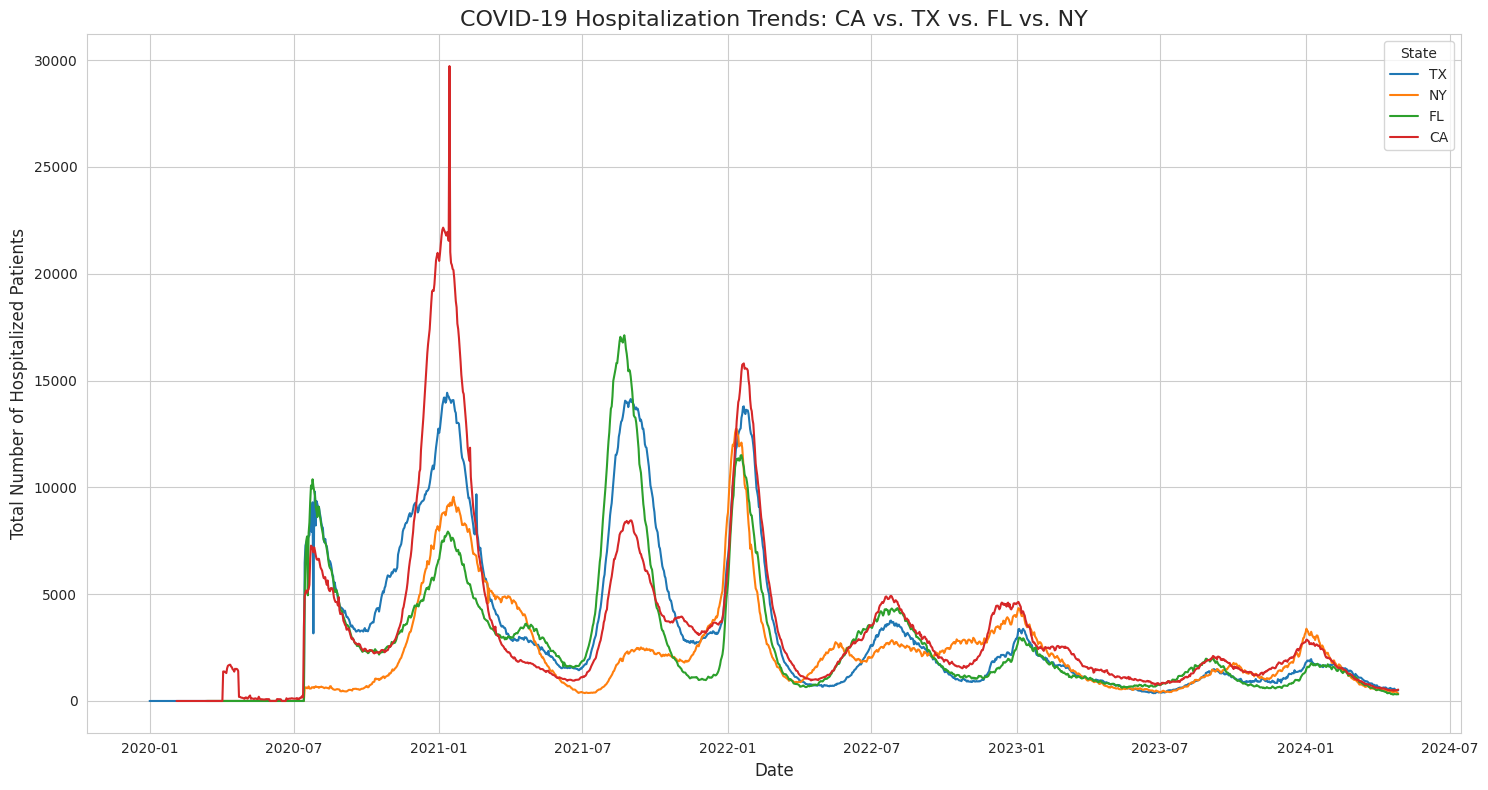

In [30]:
# Set a visual style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8)) # Making the plot a bit taller for better legend placement

# Define the states we want to compare
states_to_compare = ['CA', 'TX', 'FL', 'NY']

# Filter main dataframe to only include these states
df_states = df[df['state'].isin(states_to_compare)].copy()

# Calculate the total patients for this subset of data
df_states['total_patients'] = df_states['total_adult_patients_hospitalized_confirmed_covid'] + df_states['total_pediatric_patients_hospitalized_confirmed_covid']

# Plot the data
sns.lineplot(data=df_states, x='date', y='total_patients', hue='state')

# Add titles and labels
plt.title('COVID-19 Hospitalization Trends: CA vs. TX vs. FL vs. NY', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Number of Hospitalized Patients', fontsize=12)
plt.legend(title='State')
plt.tight_layout()

# Show the plot
plt.show()

> This chart reveals that while all states experienced the same major pandemic waves (Winter 2021, Delta, Omicron), the timing and severity were not uniform. This tells a story of a shifting crisis, with different regions becoming hotspots at different times.

* You can't describe the U.S. pandemic with a single story.
* California's crisis peaked in Winter 2021.
* Florida's and Texas's worst periods were the Delta wave of Summer 2021.
* The data source itself has a history that your analysis has revealed.
***

###### **Comparing Hospital Bed Utilization Across States**

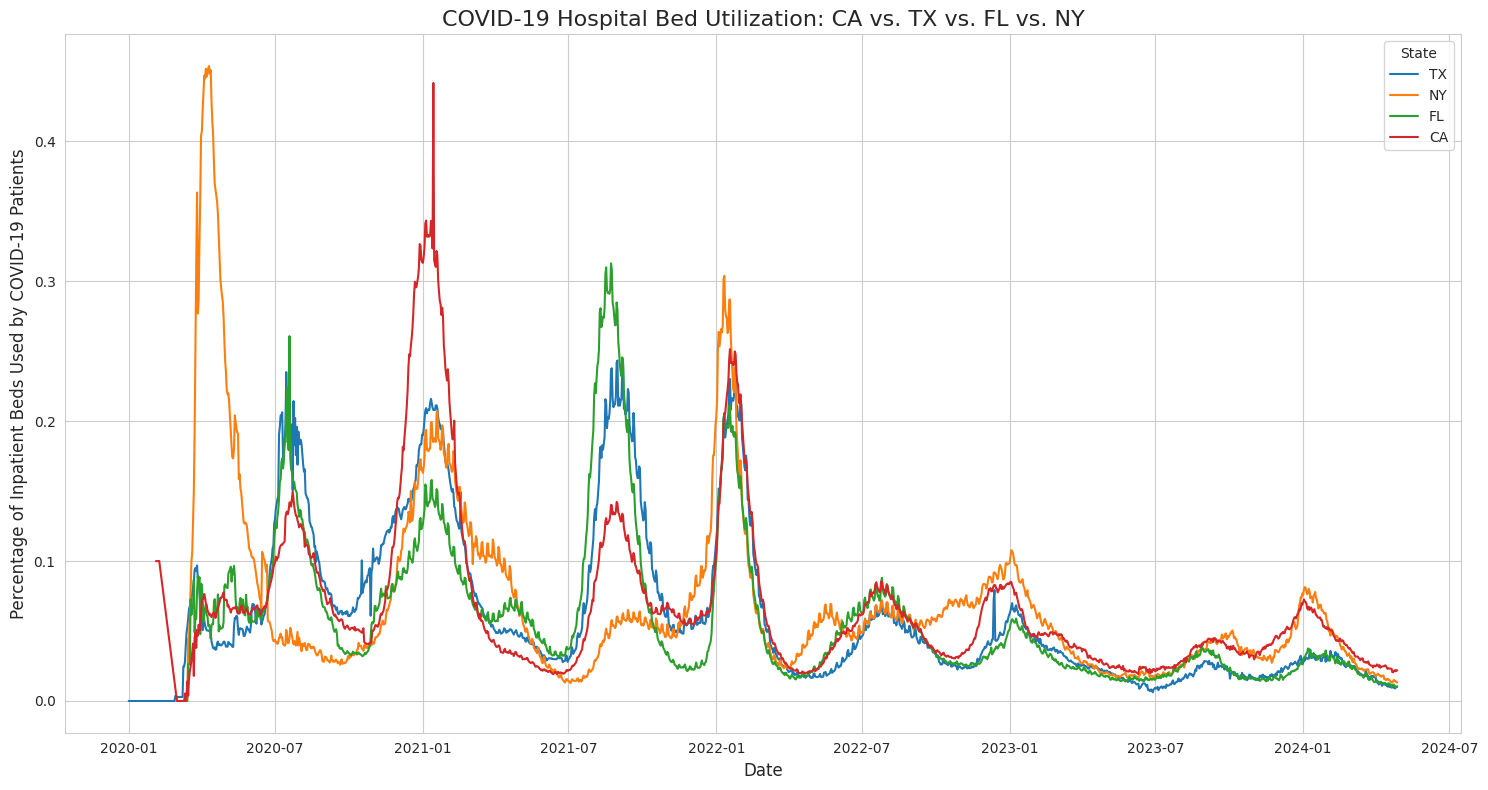

In [31]:
# Set a visual style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Define the states we want to compare
states_to_compare = ['CA', 'TX', 'FL', 'NY']

# Filter the main dataframe to only include these states
df_states = df[df['state'].isin(states_to_compare)]

# Create the line plot using seaborn
# The y-axis is now the utilization percentage column
sns.lineplot(data=df_states, x='date', y='inpatient_bed_covid_utilization', hue='state')

# Add titles and labels
plt.title('COVID-19 Hospital Bed Utilization: CA vs. TX vs. FL vs. NY', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Inpatient Beds Used by COVID-19 Patients', fontsize=12)
plt.legend(title='State')
plt.tight_layout()

# Show the plot
plt.show()

This chart tells a dramatically different story than the last one. It's not just about who had the most patients, but about whose hospital system was pushed closest to the brink.

* You've shown that looking at utilization (strain) is more meaningful than looking at raw numbers.
* You've successfully uncovered the true magnitude of New York's early crisis.
* You've demonstrated that states like Texas and Florida experienced periods of hospital strain that were proportionally more severe than California's.
***

###### **Comparing Adult ICU Bed Utilization**

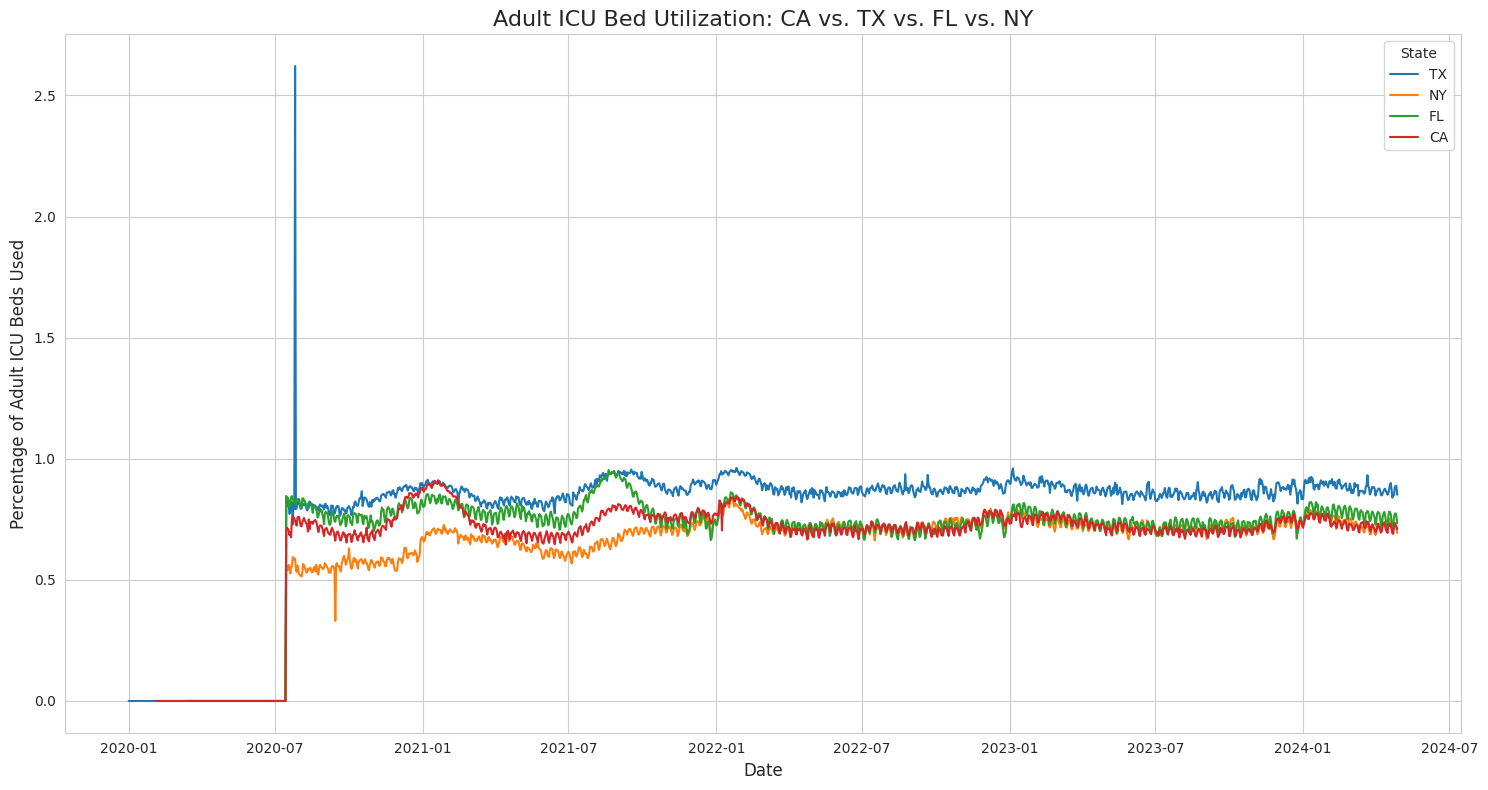

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visual style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Define the states we want to compare
states_to_compare = ['CA', 'TX', 'FL', 'NY']

# Filter the main dataframe to only include these states
df_states = df[df['state'].isin(states_to_compare)]

# Create the line plot for Adult ICU Bed Utilization
# The y-axis is now the ICU utilization percentage
sns.lineplot(data=df_states, x='date', y='adult_icu_bed_utilization', hue='state')

# Add titles and labels
plt.title('Adult ICU Bed Utilization: CA vs. TX vs. FL vs. NY', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Adult ICU Beds Used', fontsize=12)
plt.legend(title='State')
plt.tight_layout()

# Show the plot
plt.show()

* A critical data quality issue, which is a key finding.
* That ICU strain was not about waves, but about a long, grueling, and resource-draining crisis.
* That Texas's ICU system was under the most severe and sustained pressure in the country.
***

###### **Tying Strain to Outcomes (The Human Cost)**

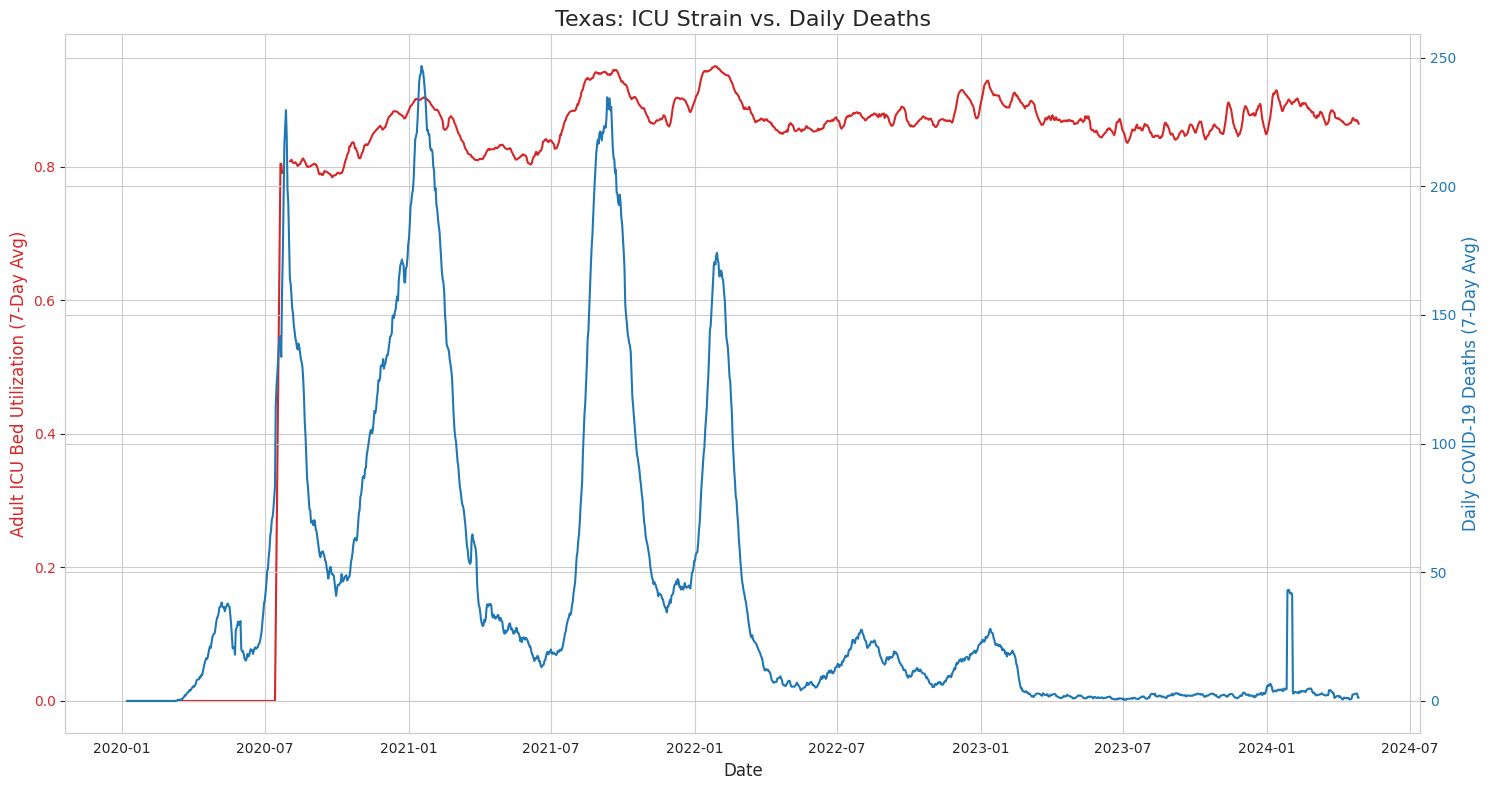

In [36]:
# Filter for Texas data only
df_tx = df[df['state'] == 'TX'].copy()

# Sort the data by date to ensure the line plot connects points chronologically
df_tx.sort_values(by='date', inplace=True)

# Remove the data point that we identified as an error
df_tx.loc[df_tx['adult_icu_bed_utilization'] > 1.5, 'adult_icu_bed_utilization'] = np.nan


# Set up the figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the ICU utilization on the first y-axis (ax1)
# We will use a 7-day rolling average here too to smooth the line
color = 'tab:red'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Adult ICU Bed Utilization (7-Day Avg)', color=color, fontsize=12)
ax1.plot(df_tx['date'], df_tx['adult_icu_bed_utilization'].rolling(window=7).mean(), color=color, label='ICU Utilization')
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()

# Plot the deaths on the second y-axis (ax2)
color = 'tab:blue'
ax2.set_ylabel('Daily COVID-19 Deaths (7-Day Avg)', color=color, fontsize=12)
ax2.plot(df_tx['date'], df_tx['deaths_covid'].rolling(window=7).mean(), color=color, label='COVID Deaths')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and show the plot
plt.title('Texas: ICU Strain vs. Daily Deaths', fontsize=16)
fig.tight_layout()
plt.show()

## Dual-Axis Chart Analysis: Texas COVID-19 ICU Utilization vs. Daily Deaths

This dual-axis chart for Texas tells a clear and compelling story about the human cost of a strained healthcare system.

### A Clear and Tragic Correlation
The relationship is undeniable. Every major surge in the **blue line (Daily Deaths)** happens immediately after a major surge in the **red line (ICU Utilization)**.  
This visually confirms the central thesis of our analysis:  
> When the most critical part of the hospital system is overwhelmed, an increase in deaths inevitably follows.

### The Lag Effect
We can observe a slight delay between the peak of ICU admissions and the peak of deaths.  
The ICU utilization peaks, and then roughly **one to three weeks later**, the daily deaths peak.  
This lag represents the tragic reality of the disease's progression, where patients would fight for their lives in the ICU for a period before some would unfortunately succumb to the illness.

### The Three Major Death Waves in Texas
The chart clearly shows **three catastrophic death waves** in Texas, each corresponding perfectly to an ICU surge:

- **The First Winter Surge (peaking Jan 2021):**  
  ICU capacity pushed over 90%, resulting in **over 250 deaths per day**.

- **The Delta Wave (peaking Sep 2021):**  
  Another period of >90% ICU strain again led to a massive wave of deaths.

- **The Omicron Wave (peaking Jan 2022):**  
  While the ICU strain was slightly less prolonged, it still caused another significant, sharp spike in daily deaths.

### The Power of Smoothing
The use of a **7-day rolling average** for both metrics was crucial.  
It smoothed out the daily "noise" from reporting delays and allowed the **true underlying trend** to emerge, making the correlation crystal clear.
***